<a href="https://colab.research.google.com/github/suleman84/Malaria-Project/blob/master/custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/cell-images/'

In [0]:
import os
import sys
import numpy as np
# import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.preprocessing import image
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten

In [0]:
parapath = "gdrive/My Drive/cell-images/Parasitized/"
uninpath = "gdrive/My Drive/cell-images//Uninfected/"
parastized = os.listdir(parapath)


In [0]:
uninfected = os.listdir(uninpath)

In [0]:
data = []
label = []
for para in parastized:
    try:
        img = image.load_img(parapath + para, target_size=(128, 128))
        x = image.img_to_array(img)
        data.append(x)
        label.append(1)
    except:
        print("Can't add "+para+" in the dataset")

In [0]:
for unin in uninfected:
    try:
        img = image.load_img(uninpath + unin, target_size=(128, 128))
        x = image.img_to_array(img)
        data.append(x)
        label.append(0)
    except:
         print("Can't add "+unin+" in the dataset")

In [0]:
data = np.array(data)
label = np.array(label)

In [20]:
print(sys.getsizeof(data))
print(data.shape)

263454864
(1340, 128, 128, 3)


In [0]:
data = data/255
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size = 0.1,random_state=0)

In [0]:
def MalariaModel():
    model = Sequential()
    model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'a11', input_shape = (128, 128, 3)))  
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'a12'))
    model.add(BatchNormalization(name = 'a13'))
    #input = (128,128,4)
    model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'a21'))   
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'a22'))
    model.add(BatchNormalization(name = 'a23'))
    #input = (64,64,8)
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'a31'))   
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'a32'))
    model.add(BatchNormalization(name = 'a33'))
    #input = (32,32,16)
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu', name = 'fc1'))
    model.add(Dense(1, activation = 'sigmoid', name = 'prediction'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
modelone = MalariaModel()
modelone.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
a11 (Conv2D)                 (None, 128, 128, 4)       112       
_________________________________________________________________
a12 (MaxPooling2D)           (None, 64, 64, 4)         0         
_________________________________________________________________
a13 (BatchNormalization)     (None, 64, 64, 4)         16        
_________________________________________________________________
a21 (Conv2D)                 (None, 64, 64, 8)         296       
_________________________________________________________________
a22 (MaxPooling2D)           (None, 32, 32, 8)         0         
_________________________________________________________________
a23 (BatchNormalization)     (None, 32, 32, 8)         32        
_________________________________________________________________
a31 (Conv2D)                 (None, 32, 32, 16)        1168      
__________

In [24]:
output = modelone.fit(x_train, y_train,epochs=1, batch_size=1000)

Epoch 1/1
1206/1206 [==============================] - 1s 957us/step - loss: 1.9379 - acc: 0.4975


In [25]:
preds = modelone.evaluate(x = x_test,y = y_test)
print("Test Accuracy : %.2f%%" % (preds[1]*100))

134/134 [==============================] - 0s 1ms/step
Test Accuracy : 51.49%


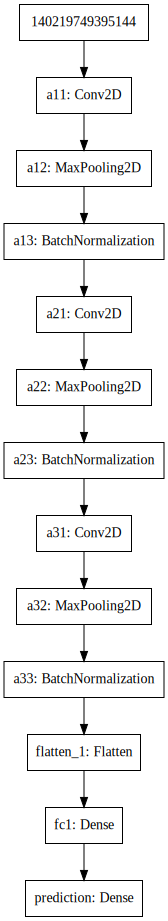

In [18]:
modelpic = plot_model(modelone, to_file='model.png')
SVG(model_to_dot(modelone).create(prog='dot', format='svg'))